<IPython.core.display.Javascript object>


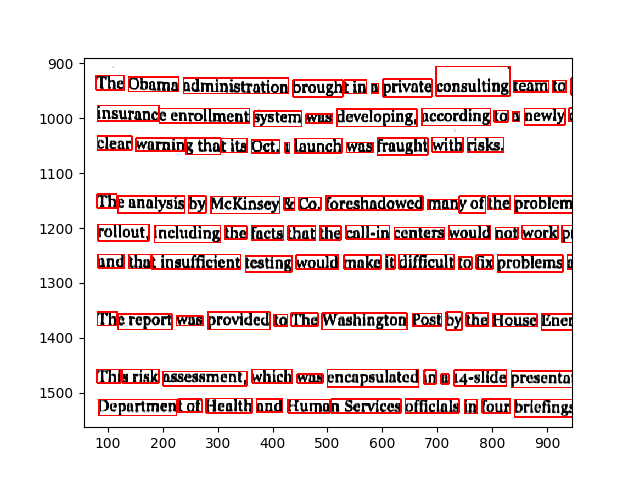

In [4]:
%matplotlib notebook
import cv2
import numpy
from PIL import Image
import locale
locale.setlocale(locale.LC_ALL, 'C') # https://github.com/sirfz/tesserocr/issues/165
from tesserocr import PyTessBaseAPI, RIL, PSM, iterate_level

MIN_CONFIDENCE = 60  # Minimum accepted confidence for words

class TesseractOCREngine():
    """
    OCREngine implementation using Google Tesseract OCR combined 
    with the tesserocr bridge library.
    """

    def extract_text(self, image):
        """
        Given an arbitrary RGB image in numpy array format, return a list of all the words
        detected in the text, along with their bounding box coordinates.

        The returned list contains tuples in this format:
        (word, x1, y1, x2, y2)
        """

        # Convert the numpy array image to a Pillow-friendly format
        pillow_img = Image.fromarray(image)

        output = []

        # Open the Tesseract context, specifiying SPARSE_TEXT as an option (used to highlight 
        # single words, rather than lines of text )
        with PyTessBaseAPI(psm=PSM.SPARSE_TEXT) as api:
            api.SetVariable("save_blob_choices", "T")
            api.SetImage(pillow_img)
            api.Recognize()
            
            ri = api.GetIterator()
            level = RIL.WORD

             # Cycle through the words, populating the list
            for r in iterate_level(ri, level):
                word = r.GetUTF8Text(level)
                conf = r.Confidence(level)
                box = r.BoundingBox(level)
                if word and conf > MIN_CONFIDENCE:
                    entry = (word, box[0], box[1], box[2], box[3], conf)
                    output.append(entry)
        
        return output

img = cv2.imread('../../dataset/warped.jpg')
engine = TesseractOCREngine()
boxes = engine.extract_text(img)

import matplotlib.pyplot as plt

for box in boxes:
    cv2.rectangle(img, (box[1], box[2]), (box[3], box[4]), (255,0,0), 2)
    
plt.imshow(img)